MAE: 2543.9758251029275
MSE: 20864569.513376206
R2: 0.8656055394920775
Best Model MAE: 2478.8333427958873
Best Model MSE: 19010942.90695886
Best Model R2: 0.8775452609223655


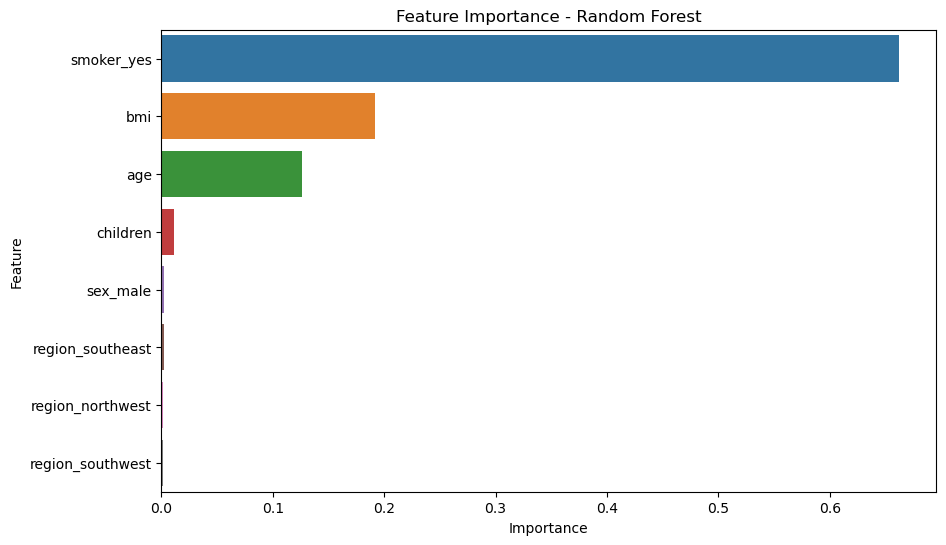

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv?raw=true'
data = pd.read_csv(url)

# Data Preprocessing
# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Define categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Preprocessing for numerical data: StandardScaler
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: OneHotEncoder
categorical_transformer = OneHotEncoder(drop='first')

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestRegressor(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing of training data, fit model
pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Preprocessing of validation data, get predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model MAE: {mae_best}')
print(f'Best Model MSE: {mse_best}')
print(f'Best Model R2: {r2_best}')

# Save the best model
import joblib
joblib.dump(best_model, 'best_rf_model_medical_insurance.pkl')

# Feature Importance
importances = best_model.named_steps['model'].feature_importances_
feature_names = (numerical_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()